In [563]:
library(ggplot2)
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)

Cargar los datos en un dataframe llamado: airbnb

In [564]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [565]:
head(airbnb, n=6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [566]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

#Se actualizan los nombres de las columnas
colnames(airbnb) <- newnames

#estructura actualizada
str(airbnb)

'data.frame':	13207 obs. of  13 variables:
 $ CodigoPostal  : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Barrio        : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler  : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes  : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos     : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios: int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas      : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama      : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades   : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio        : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Puntuacion    :

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [569]:
airbnb['MetrosCuadrados'] <- airbnb$PiesCuadrados*0.092903 

#Se verifica que se haya integrado la nueva columna
str(airbnb)

'data.frame':	13207 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes   : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos      : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios : int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas       : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados  : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio         : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Pun

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [570]:
#se genera una copia para implementar reemplazo de valores

airbnb2 <- airbnb

levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "-"] <- NA
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == ""] <- NA
levels(airbnb2$CodigoPostal)[substr(levels(airbnb2$CodigoPostal),1,2) == "20"] <- NA
levels(airbnb2$CodigoPostal)[substr(levels(airbnb2$CodigoPostal),1,2) == "25"] <- NA
levels(airbnb2$CodigoPostal)[substr(levels(airbnb2$CodigoPostal),1,2) == "27"] <- NA
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "28"] <- NA
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "2804"] <- "28004"
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "2805"] <- "28005"
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "2815"] <- "28015"
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "Madrid 28004"] <- "28004"
levels(airbnb2$CodigoPostal)[substr(levels(airbnb2$CodigoPostal),1,5) == "28002"] <- "28002"
levels(airbnb2$CodigoPostal)[substr(levels(airbnb2$CodigoPostal),1,5) == "28051"] <- "28051"
levels(airbnb2$CodigoPostal)[levels(airbnb2$CodigoPostal) == "280013"] <- "28013"

#se actualiza el dataframe original
airbnb <- airbnb2


Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [573]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
61 Levels: 28001 28013 28002 28003 28004 28005 28006 28007 28008 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [574]:
totales <- airbnb %>% count(airbnb$CodigoPostal)
print("Los 5 códigos con mas entradas son: ")
totales[order(totales$n, decreasing = TRUE), ][1:5,]

print("Los 5 códigos con menos entradas son: ")
totales[order(totales$n, decreasing = FALSE), ][1:5,]

[1] "Los 5 códigos con mas entradas son: "


,airbnb$CodigoPostal,n
,<fct>,<int>
13,28012,2060
5,28004,1796
6,28005,1195
2,28013,1020
14,28014,630


[1] "Los 5 códigos con menos entradas son: "


,airbnb$CodigoPostal,n
,<fct>,<int>
48,28048,1
52,28052,1
56,28056,1
57,28058,1
58,28060,1


¿Cuales son los barrios que hay en el código postal 28012?

In [575]:
barrios_28012 <- airbnb[airbnb$CodigoPostal == "28012", ]
distinct(barrios_28012, Barrio)

,Barrio
,<fct>
18,Sol
34,Acacias
NA,NA
72,Palos de Moguer
77,Embajadores
104,Cortes
987,Palacio
1716,Universidad
5075,Delicias


¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [576]:
barrios_28012 %>% count(barrios_28012$Barrio)

barrios_28012$Barrio,n
<fct>,<int>
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [577]:
paste("El número de barrios es: ",lengths(distinct(airbnb, Barrio)))

paste("Los barrios son:")
paste(toString(unique(airbnb$Barrio)))

[1] "El número de barrios es:  125"

[1] "Los barrios son:"

[1] "Universidad, Sol, Imperial, Acacias, Chopera, Delicias, Palos de Moguer, Embajadores, Cortes, Atocha, Pacífico, Adelfas, Estrella, Ibiza, Jerónimos, Niño Jesús, Palacio, Justicia, Recoletos, Goya, Fuente del Berro, Arapiles, Trafalgar, Almagro, Guindalera, Lista, Castellana, El Viso, Prosperidad, Valverde, Casa de Campo, El Goloso, Numancia, Cármenes, Puerta del Angel, Lucero, Aluche, San Isidro, Campamento, Comillas, Opañel, Vista Alegre, Ciudad Jardín, Hispanoamérica, Nueva España, Castilla, Bellas Vistas, Cuatro Caminos, Castillejos, Vallehermoso, Almenara, Valdeacederas, Berruguete, Gaztambide, Rios Rosas, Peñagrande, Argüelles, Puerta Bonita, Buenavista, Abrantes, Orcasur, San Fermín, Almendrales, Pradolongo, Portazgo, Entrevías, San Diego, Palomeras Bajas, Fontarrón, Vinateros, Ventas, Pueblo Nuevo, Quintana, Concepción, San Juan Bautista, Costillares, Piovera, Canillas, Pinar del Rey, Apostol Santiago, San Andrés, Valdefuentes, Butarque, Los Angeles, Casco Histórico de Vicálvaro, Simancas, Rejas, Salvador, Casco Histórico de Barajas, Pilar, La Paz, Mirasierra, Ciudad Universitaria, Moscardó, Palomeras Sureste, Marroquina, Media Legua, Los Rosales, Casco Histórico de Vallecas, Timón, Corralejos, Cuatro Vientos, Colina, San Cristobal, Alameda de Osuna, Aeropuerto, Palomas, Zofío, Aguilas, Legazpi, Fuentelareina, Aravaca, Ambroz, Canillejas, Valdezarza, Amposta, San Pascual, Santa Eugenia, Arcos, Rosas, Valdemarín, El Plantío, Hellín, Pavones, Orcasitas"

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [578]:
head(airbnb %>% count(Barrio, sort = TRUE), n = 5)

,Barrio,n
,<fct>,<int>
1,Embajadores,1844
2,Universidad,1358
3,Palacio,1083
4,Sol,940
5,Justicia,785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [579]:
paste(" El número de Tipos de Alquiler es: ", length(unique(airbnb$TipoAlquiler)))

paste(" Tipos de Alquiler:  ", levels(unique(airbnb$TipoAlquiler)))

print(" Entradas por Tipo de Alquiler: ")
airbnb %>% count(airbnb$TipoAlquiler)


[1] " El número de Tipos de Alquiler es:  3"

[1] " Tipos de Alquiler:   Entire home/apt"
[2] " Tipos de Alquiler:   Private room"   
[3] " Tipos de Alquiler:   Shared room"

[1] " Entradas por Tipo de Alquiler: "


airbnb$TipoAlquiler,n
<fct>,<int>
Entire home/apt,7903
Private room,5113
Shared room,191


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


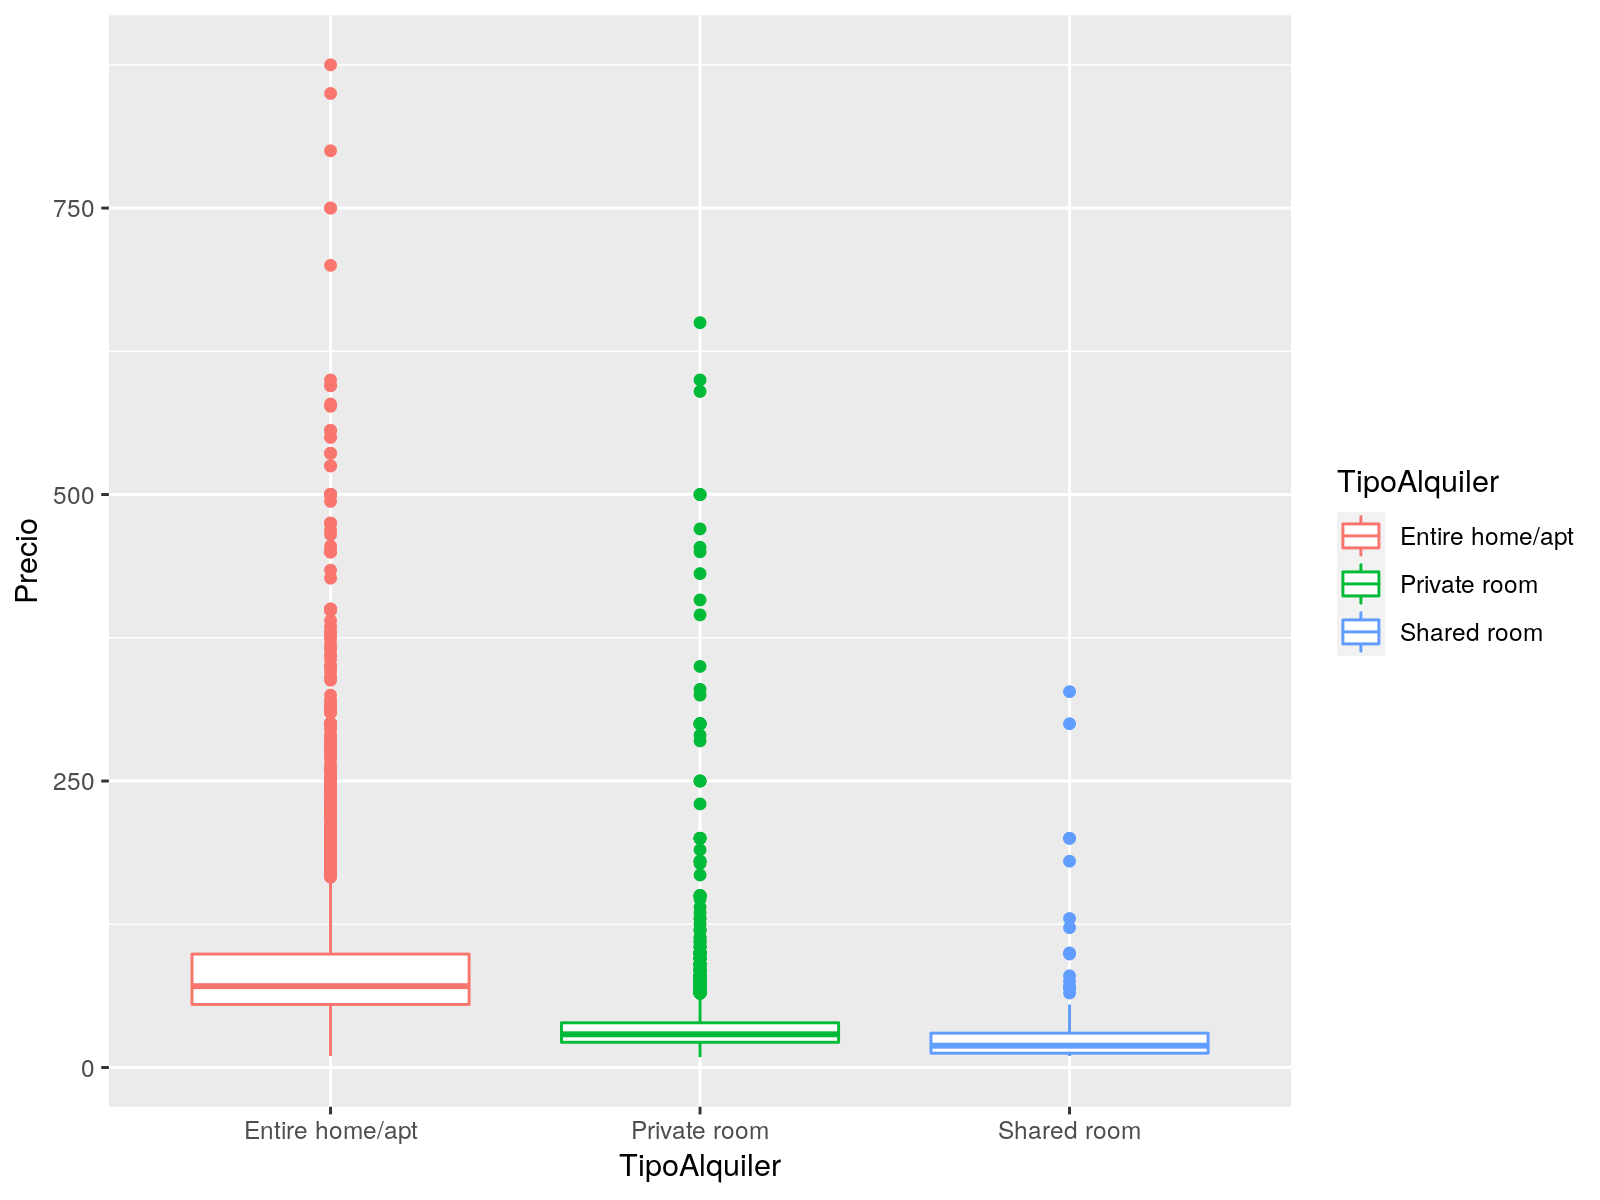

In [580]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+
 geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [581]:
paste("El promedio para el tipo Entire home/opt : ",mean(na.omit((airbnb[airbnb$TipoAlquiler == 'Entire home/apt',])$Precio)))
paste("El promedio para el tipo Private room : ",mean(na.omit((airbnb[airbnb$TipoAlquiler == 'Private room',])$Precio)))
paste("El promedio para el tipo Shared room : ",mean(na.omit((airbnb[airbnb$TipoAlquiler == 'Shared room',])$Precio)))

paste("Pendiente de resolver.... ¿es estadísticamente significativa?")

[1] "El promedio para el tipo Entire home/opt :  87.2966058763931"

[1] "El promedio para el tipo Private room :  34.255135981217"

[1] "El promedio para el tipo Shared room :  29.8534031413613"

[1] "Pendiente de resolver.... ¿es estadísticamente significativa?"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [582]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [583]:
#conteo de elementos por Barrio
head(airbnb_entire %>% count(Barrio, sort = TRUE), n = 5)

,Barrio,n
,<fct>,<int>
1,Embajadores,1228
2,Universidad,984
3,Palacio,769
4,Sol,701
5,Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [584]:
df_agr <- aggregate(Precio~Barrio, airbnb_entire, mean, na.rm=TRUE)
df_mayor_precio <- df_agr[order(df_agr$Precio,decreasing = TRUE), ]
paste("Los 5 barrios de mayor precio medio son");
head(df_mayor_precio,5)

paste("El promedio de los 5 barrios de mayor precio medio es: ", mean(df_mayor_precio$Precio))


[1] "Los 5 barrios de mayor precio medio son"

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


[1] "El promedio de los 5 barrios de mayor precio medio es:  79.174780343761"

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [585]:
#df_agr   [Barrio, PrecioMedio]        generado de airbnb_entire

#hay que contar Barrio en airbnb_entire
df_conteo <- airbnb_entire %>% count(Barrio, sort = TRUE)       #df_conteno [Barrio, n]

#se hace el merge
#total <- merge(data frameA,data frameB,by="ID")
df_merge <- merge(df_agr, df_conteo, by="Barrio")

nombre_col<-c("Barrio","PrecioMedio","Freq")

#Se actualizan los nombres de las columnas
colnames(df_merge) <- nombre_col

head(df_merge)

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
1,Abrantes,46.00000,3
2,Acacias,68.16393,61
3,Adelfas,68.72727,33
4,Aeropuerto,38.00000,2
5,Aguilas,54.50000,2
6,Alameda de Osuna,138.75000,4


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [586]:
#head(df[df$VAR1==1,],20)

orden <- df_merge[order(df_merge$PrecioMedio,decreasing = TRUE),]
paste("Barrios con mayor precio y más de 100 entradas:")
head(orden[orden$Freq > 100,], n = 5)

[1] "Barrios con mayor precio y más de 100 entradas:"

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

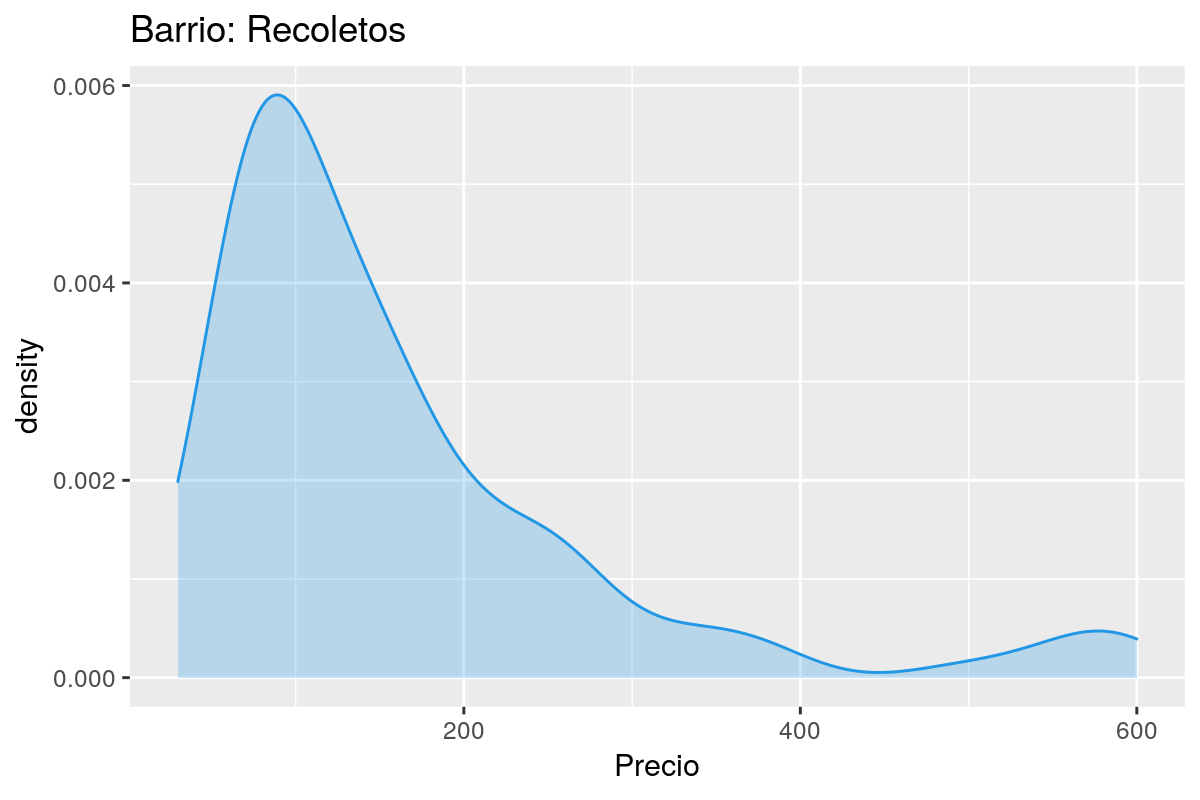

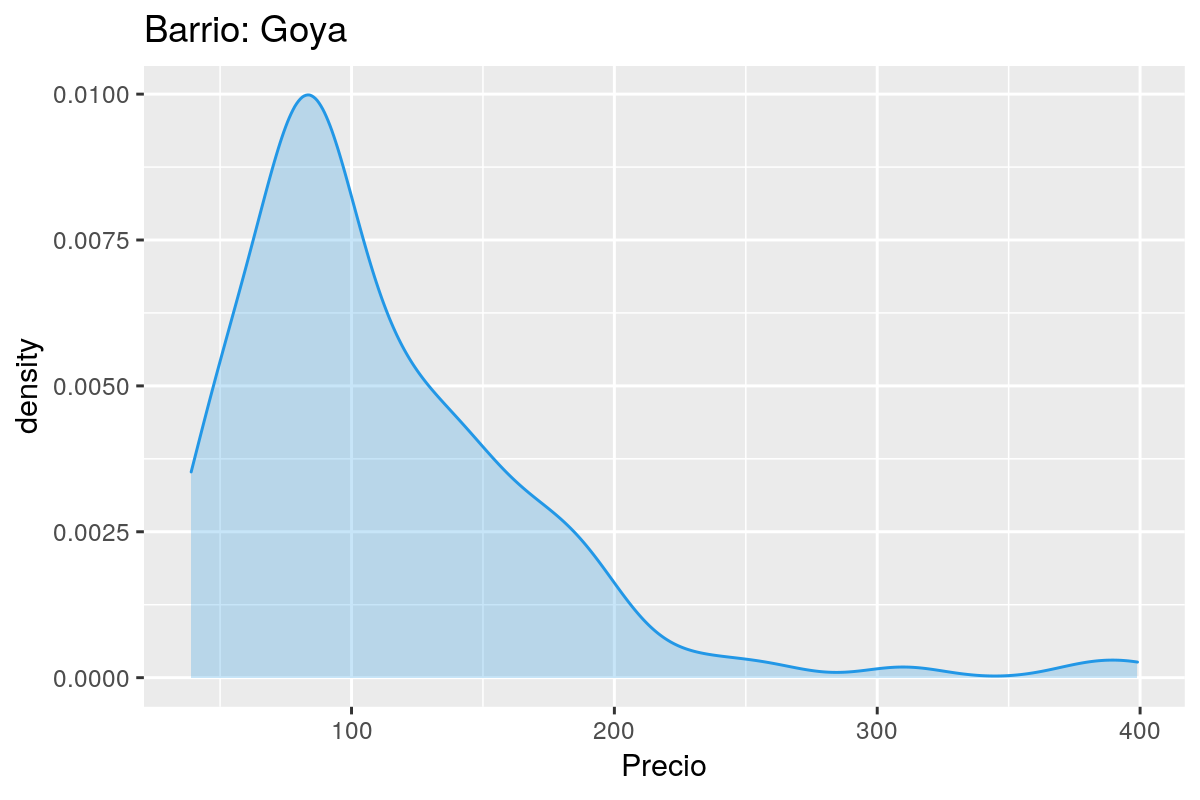

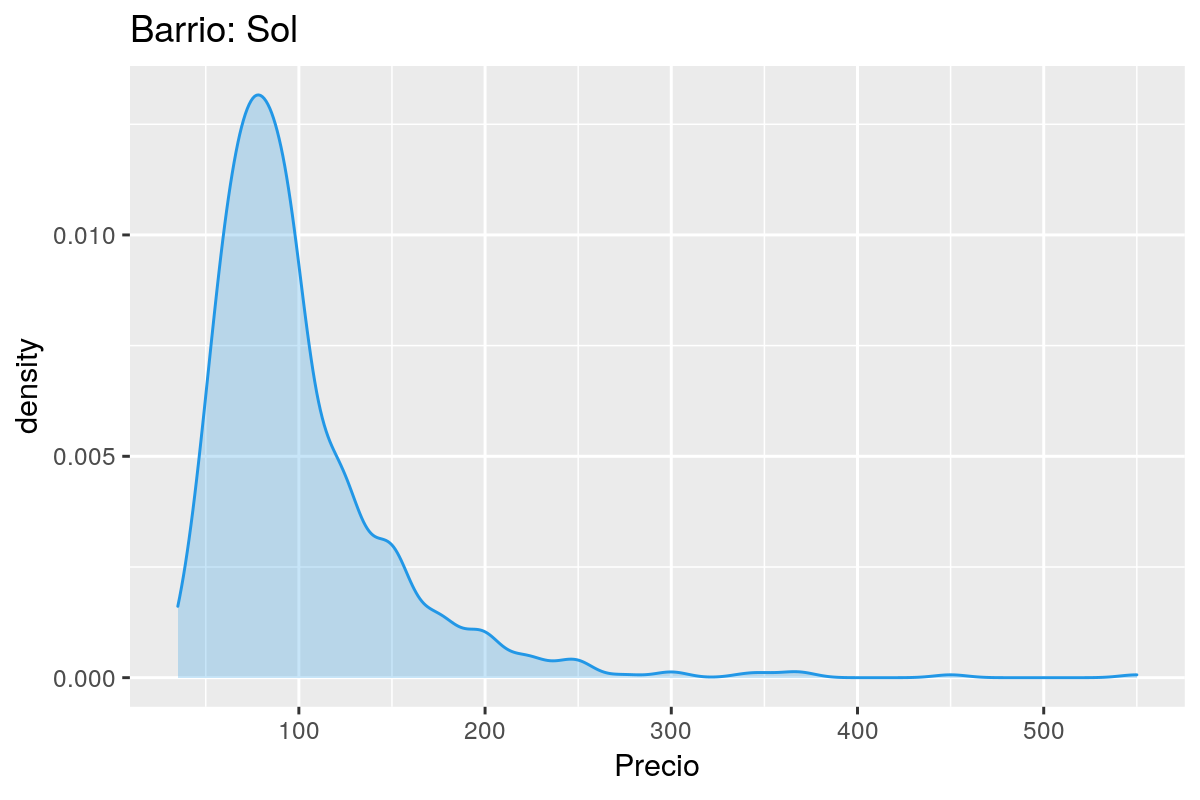

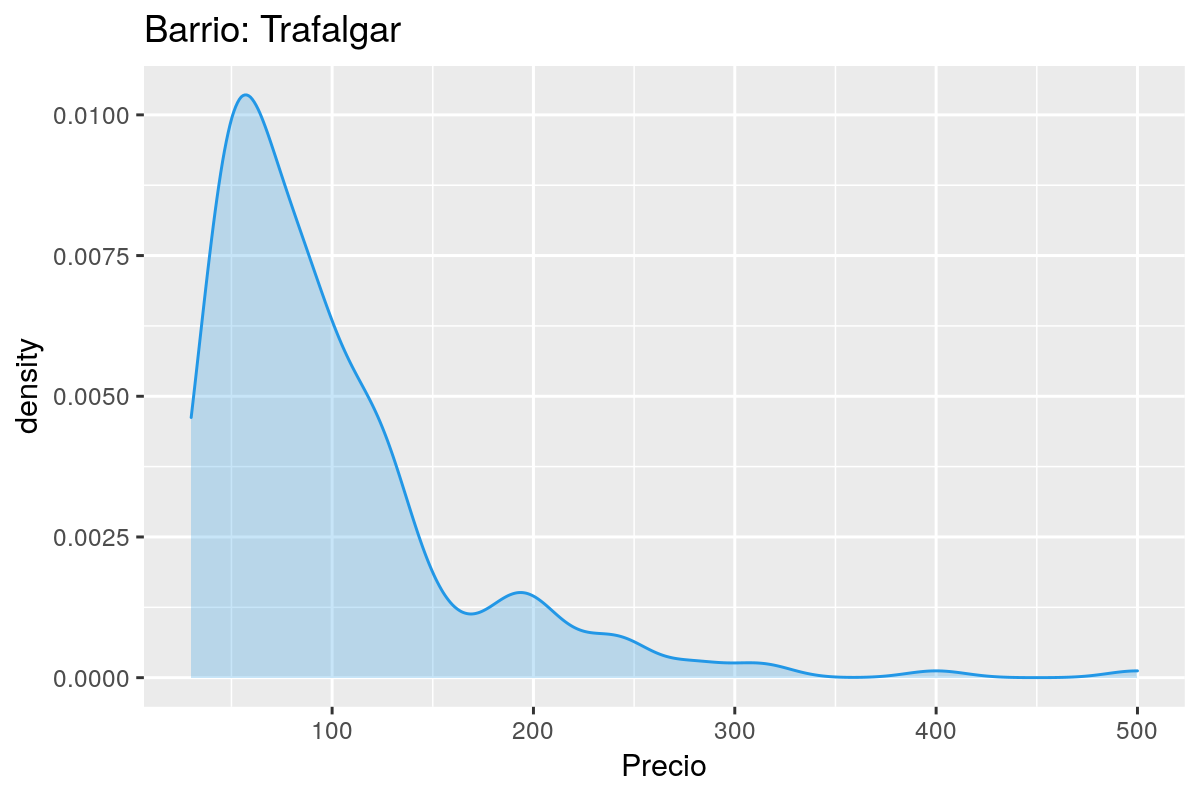

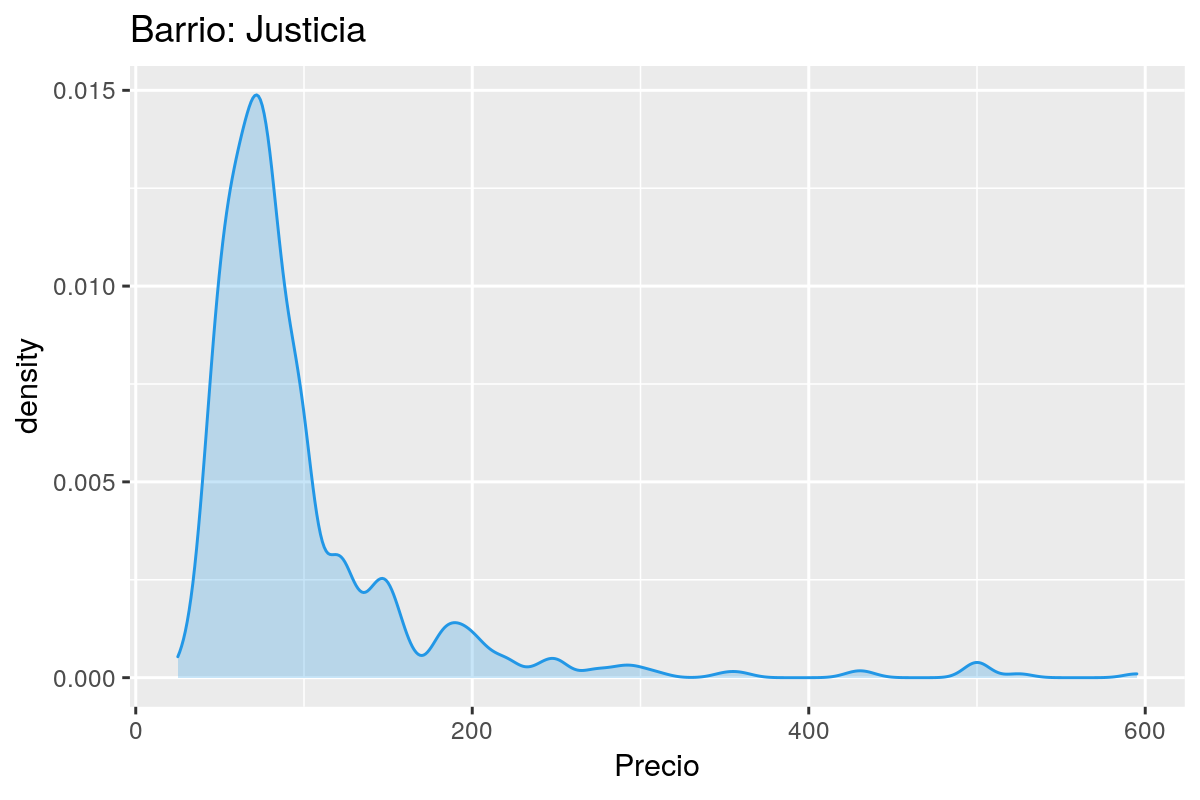

In [749]:
df_den <- airbnb_entire[airbnb_entire$Barrio == 'Recoletos',]
df_den <- df_den[!is.na(df_den$Precio),]

ggplot(df_den, aes(x=Precio))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Recoletos")

df_den <- airbnb_entire[airbnb_entire$Barrio == 'Goya',]
df_den <- df_den[!is.na(df_den$Precio),]

ggplot(df_den, aes(x=Precio))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Goya")

df_den <- airbnb_entire[airbnb_entire$Barrio == 'Sol',]
df_den <- df_den[!is.na(df_den$Precio),]

ggplot(df_den, aes(x=Precio))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Sol")

df_den <- airbnb_entire[airbnb_entire$Barrio == 'Trafalgar',]
df_den <- df_den[!is.na(df_den$Precio),]

ggplot(df_den, aes(x=Precio))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Trafalgar")

df_den <- airbnb_entire[airbnb_entire$Barrio == 'Justicia',]
df_den <- df_den[!is.na(df_den$Precio),]

ggplot(df_den, aes(x=Precio))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Justicia")



Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [588]:
df_tam_medio <- aggregate(MetrosCuadrados~Barrio, airbnb_entire, mean, na.rm=TRUE)

#se hace el merge
df_merge_2 <- merge(df_merge, df_tam_medio, by="Barrio")

#vuelve a ordenar
orden <- df_merge_2[order(df_merge_2$PrecioMedio,decreasing = TRUE),]
paste("Barrios con mayor precio y más de 100 entradas:")
head(orden[orden$Freq > 100,], n = 5)

#dataframe actualizado en orden

[1] "Barrios con mayor precio y más de 100 entradas:"

,Barrio,PrecioMedio,Freq,MetrosCuadrados
,<fct>,<dbl>,<int>,<dbl>
46,Recoletos,161.92537,135,26.66316
28,Goya,111.33803,142,51.68504
52,Sol,100.75036,701,45.61692
53,Trafalgar,98.57848,223,29.30426
31,Justicia,98.25468,534,28.52669


In [693]:
#reemplaza los NA de MetrosCuadrados con la media para cada Barrio
#y se usa una copia de airbnb_entire como dataframe 
copia <- airbnb_entire
copia$MetrosCuadrados[is.na(copia$MetrosCuadrados) & copia$Barrio == "Recoletos"] <- 26.66316
copia$MetrosCuadrados[is.na(copia$MetrosCuadrados) & copia$Barrio == "Goya"] <- 51.68504
copia$MetrosCuadrados[is.na(copia$MetrosCuadrados) & copia$Barrio == "Sol"] <- 45.61692
copia$MetrosCuadrados[is.na(copia$MetrosCuadrados) & copia$Barrio == "Trafalgar"] <- 29.30426
copia$MetrosCuadrados[is.na(copia$MetrosCuadrados) & copia$Barrio == "Justicia"] <- 28.52669

In [696]:
#valida los reemplazos
test<-subset(copia,Barrio=="Sol")
df_test <- test %>% count(MetrosCuadrados, sort = TRUE) 
head(df_test)

,MetrosCuadrados,n
,<dbl>,<int>
1,45.616920,641
2,0.000000,20
3,60.015338,4
4,40.041193,3
5,4.180635,2
6,69.955959,2


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

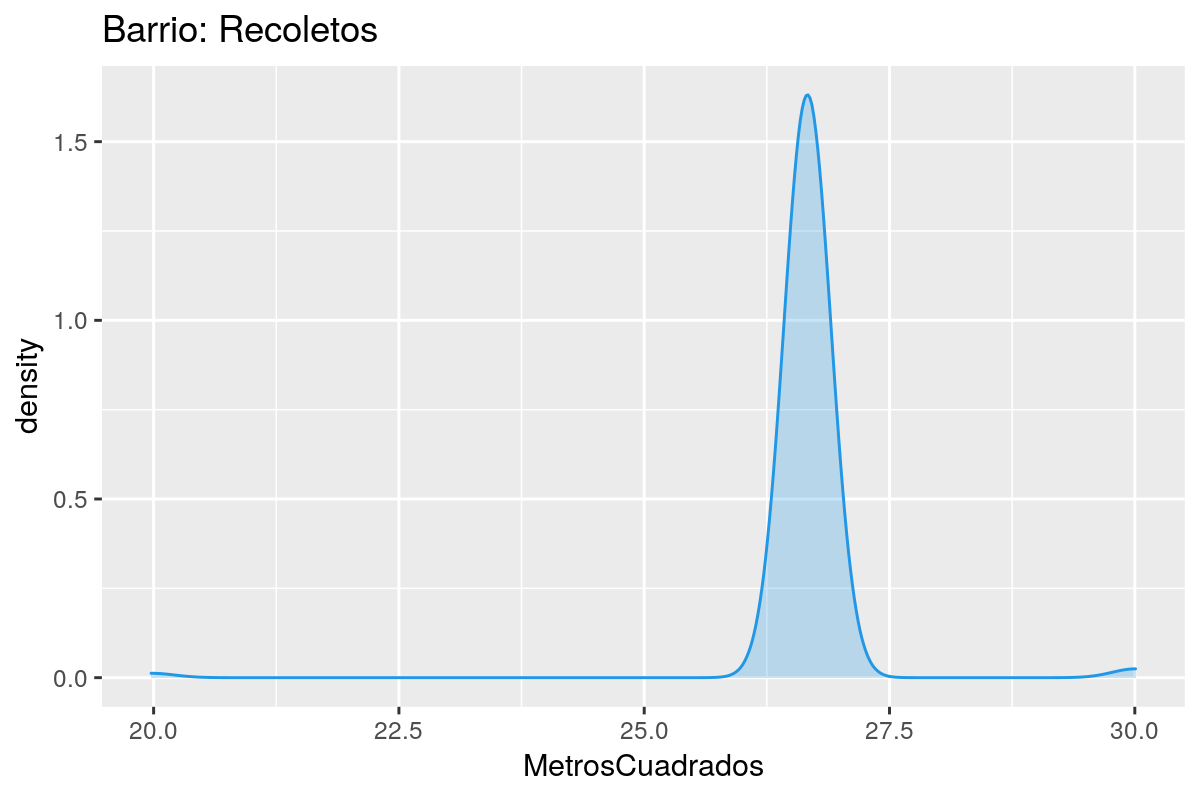

In [692]:
df_den <- copia[copia$Barrio == 'Recoletos',]
df_den <- df_den[!is.na(df_den$MetrosCuadrados),]

ggplot(df_den, aes(x=MetrosCuadrados))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Recoletos")

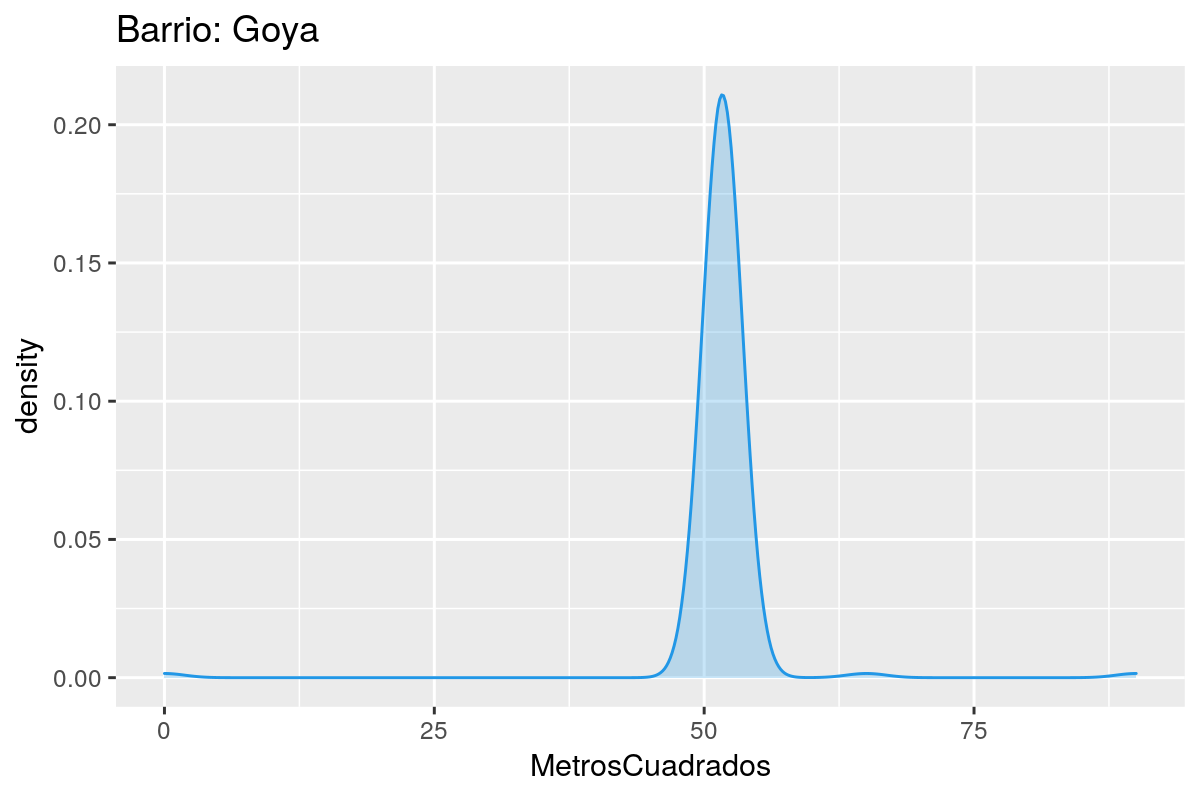

In [700]:
df_den <- copia[copia$Barrio == 'Goya',]
df_den <- df_den[!is.na(df_den$MetrosCuadrados),]

ggplot(df_den, aes(x=MetrosCuadrados))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Goya")

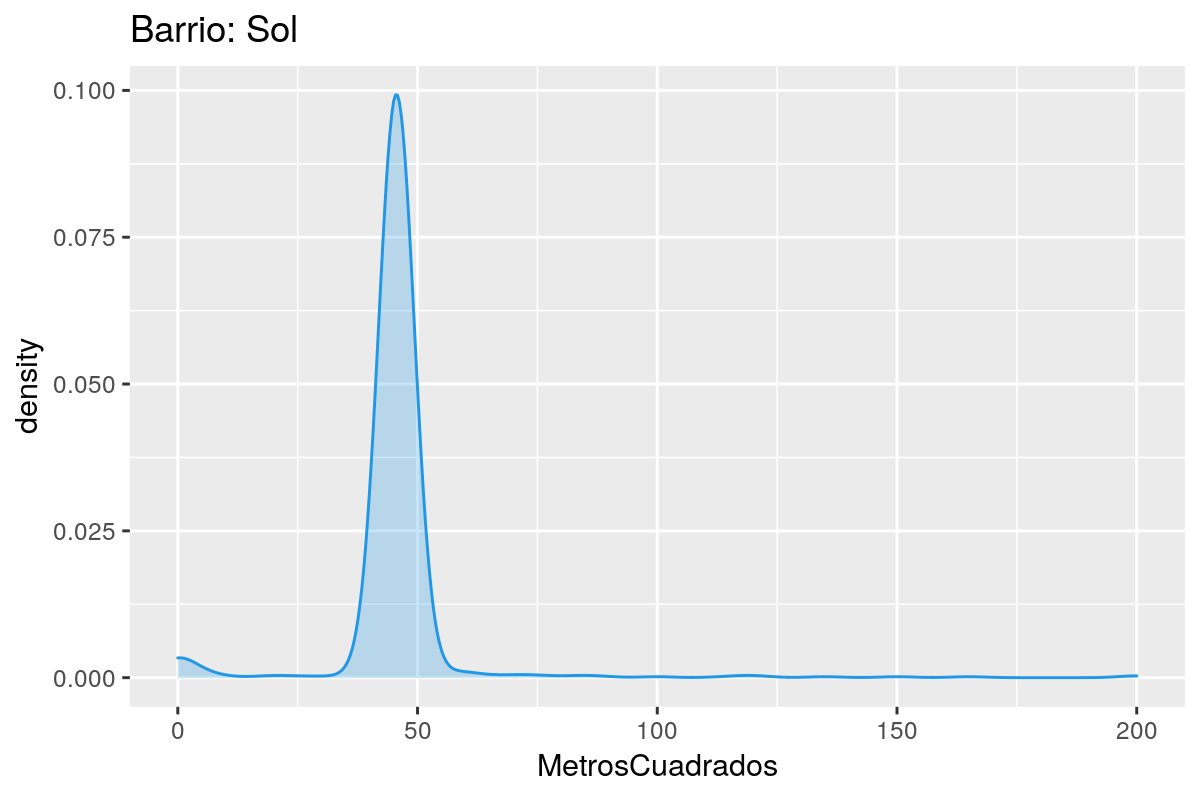

In [699]:
df_den <- copia[copia$Barrio == 'Sol',]
df_den <- df_den[!is.na(df_den$MetrosCuadrados),]

ggplot(df_den, aes(x=MetrosCuadrados))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Sol")

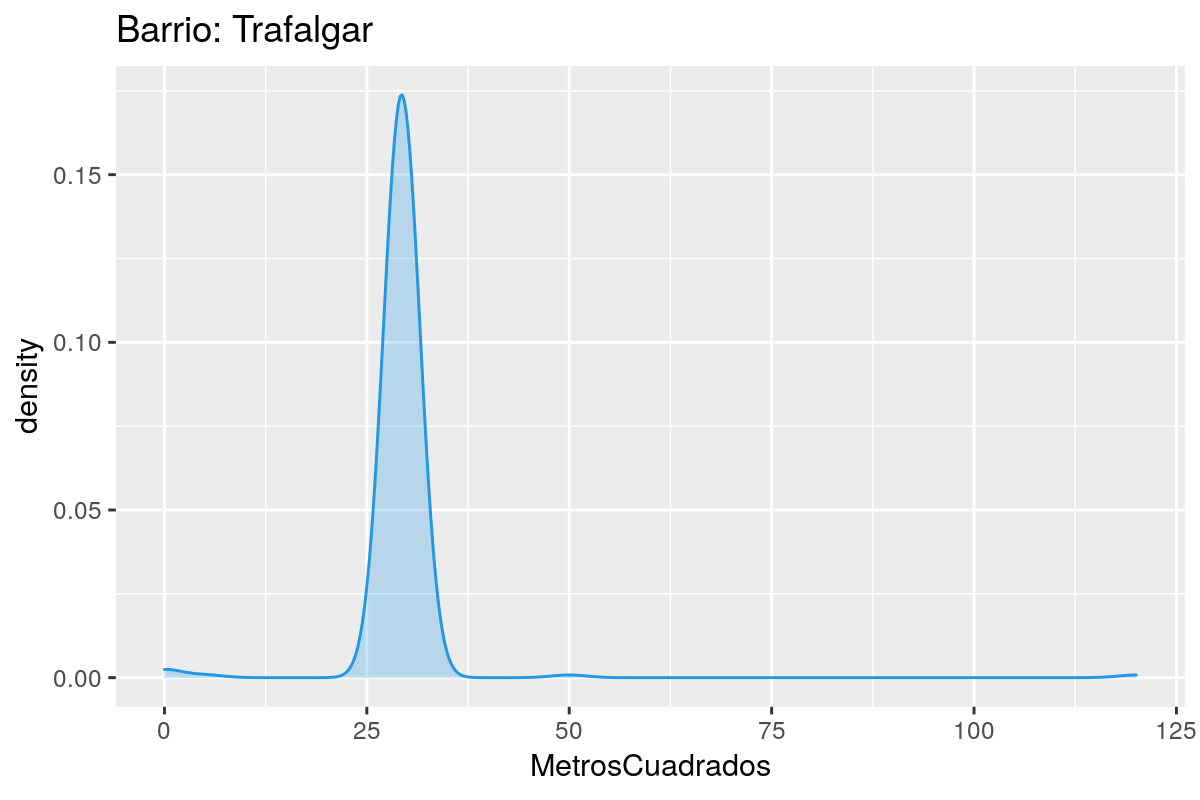

In [701]:
df_den <- copia[copia$Barrio == 'Trafalgar',]
df_den <- df_den[!is.na(df_den$MetrosCuadrados),]

ggplot(df_den, aes(x=MetrosCuadrados))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Trafalgar")

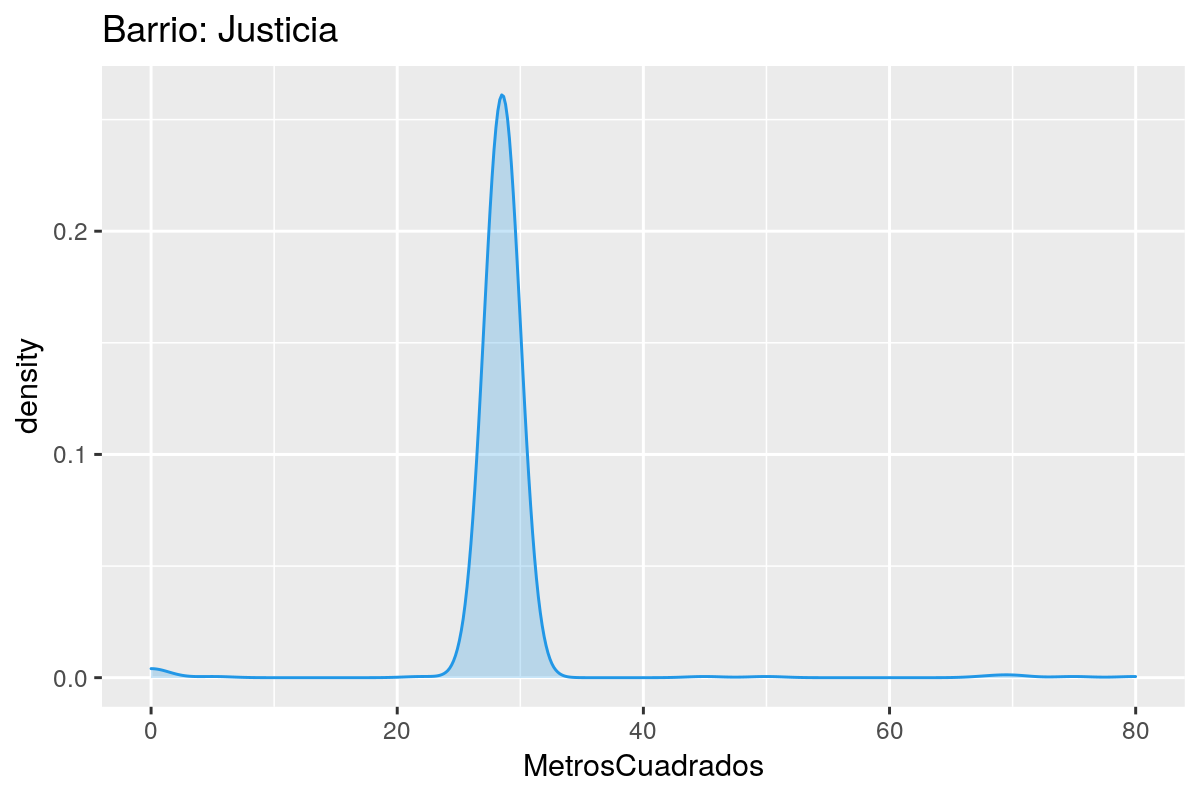

In [702]:
df_den <- copia[copia$Barrio == 'Justicia',]
df_den <- df_den[!is.na(df_den$MetrosCuadrados),]
ggplot(df_den, aes(x=MetrosCuadrados))+ geom_density(color = 4,
               fill = 4,
               alpha = 0.25) + ggtitle("Barrio: Justicia")

In [703]:
back <- airbnb_entire

#restaura el contenido de airbnb_entire

airbnb_entire <- copia

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [622]:
paste("Pendiente responder....")

[1] "Pendiente responder...."

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [704]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [705]:
#damos un vistazo a la correlación entre las variables
cor(barrio_sol[,c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')])

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.1607840
NumDormitorios,0.6761906,1.0000000,0.7594598,0.1917853
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.1706579
MetrosCuadrados,0.1607840,0.1917853,0.1706579,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


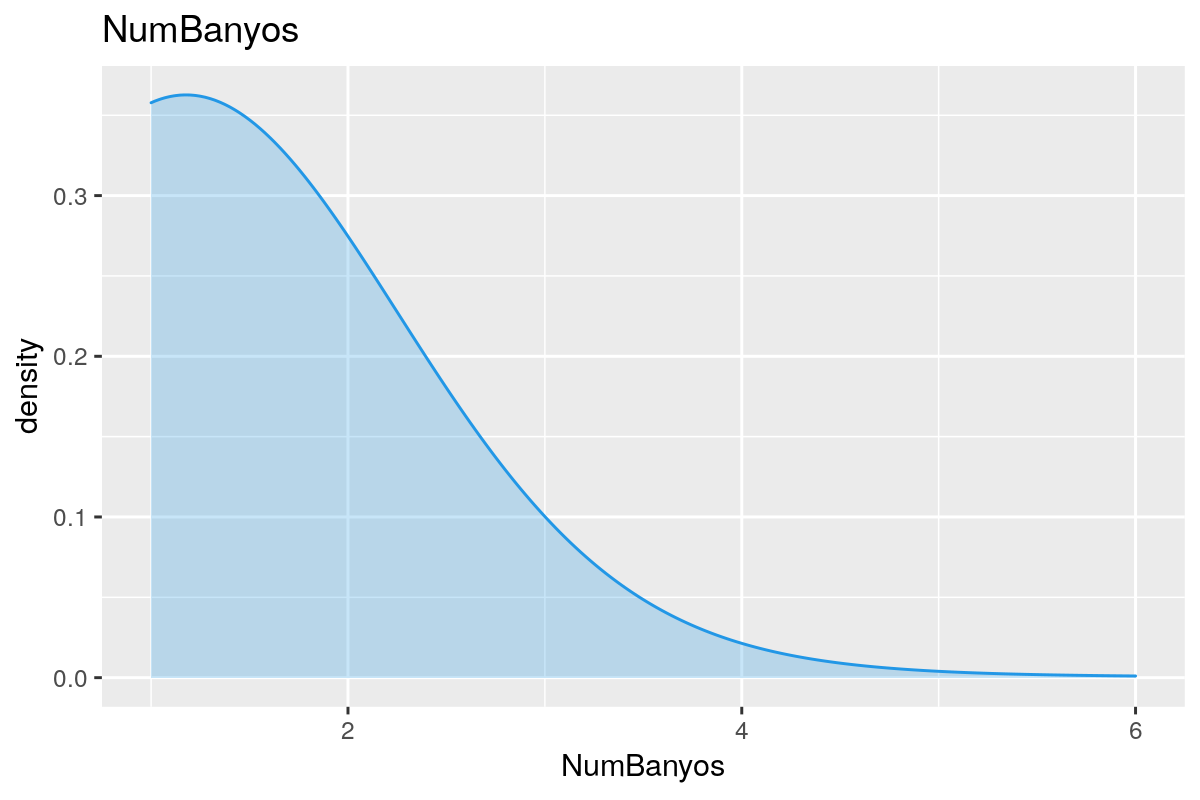

In [750]:
ggplot(barrio_sol, aes(x=NumBanyos))+ 
        geom_density(color = 4,
               fill = 4,
               alpha = 0.25, bw=1) + ggtitle("NumBanyos")

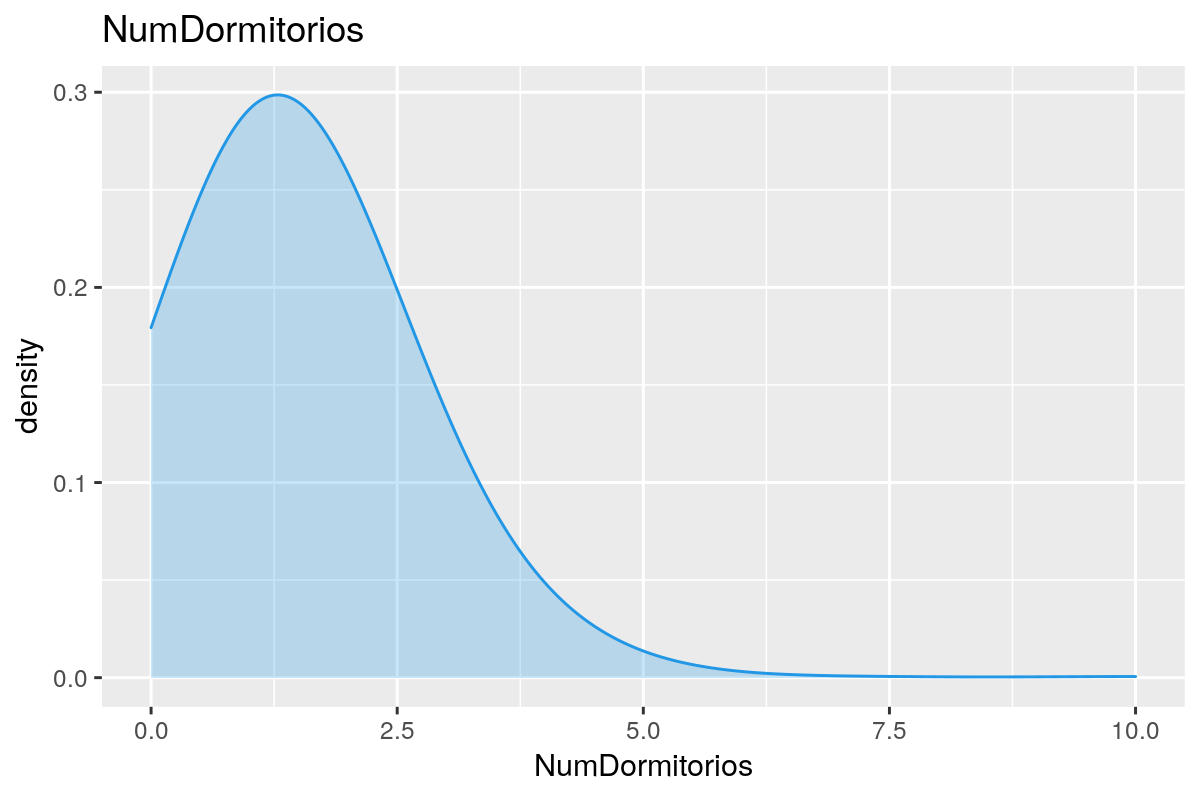

In [751]:
ggplot(barrio_sol, aes(x=NumDormitorios))+ 
        geom_density(color = 4,
               fill = 4,
               alpha = 0.25, bw=1) + ggtitle("NumDormitorios")

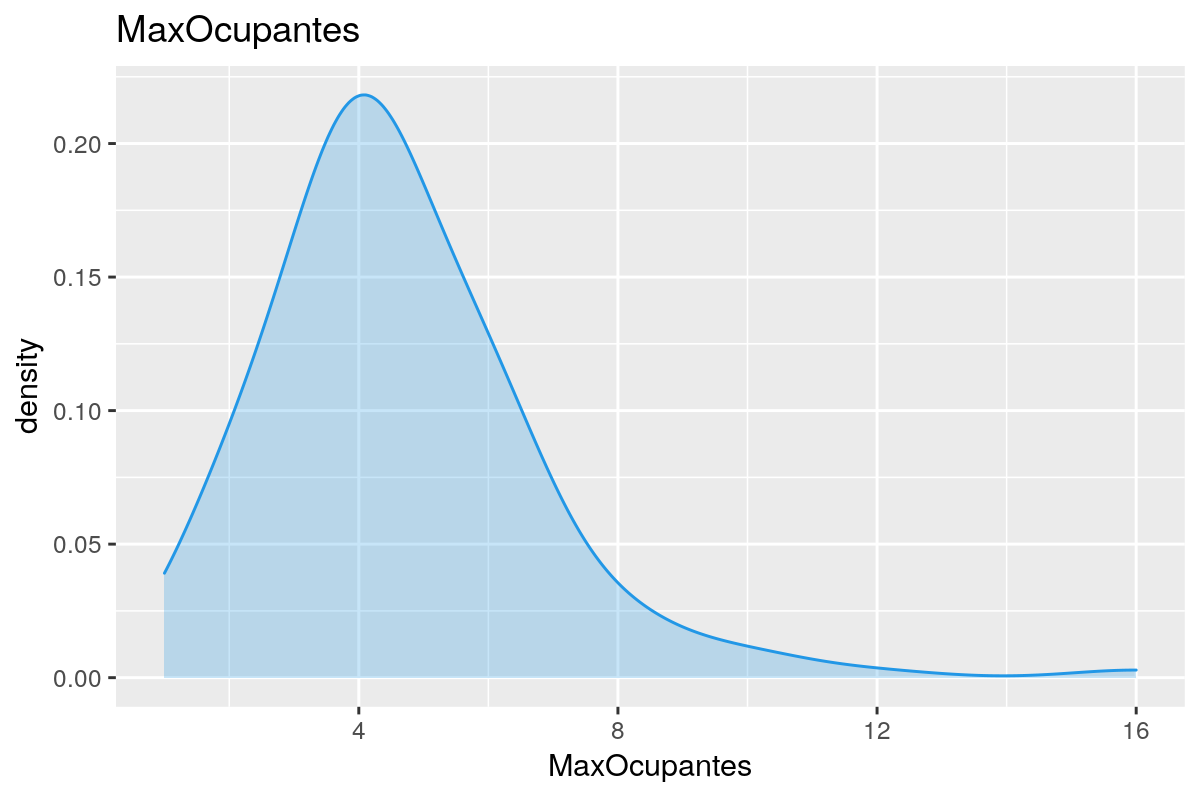

In [753]:
ggplot(barrio_sol, aes(x=MaxOcupantes))+ 
        geom_density(color = 4,
               fill = 4,
               alpha = 0.25, bw=1) + ggtitle("MaxOcupantes")

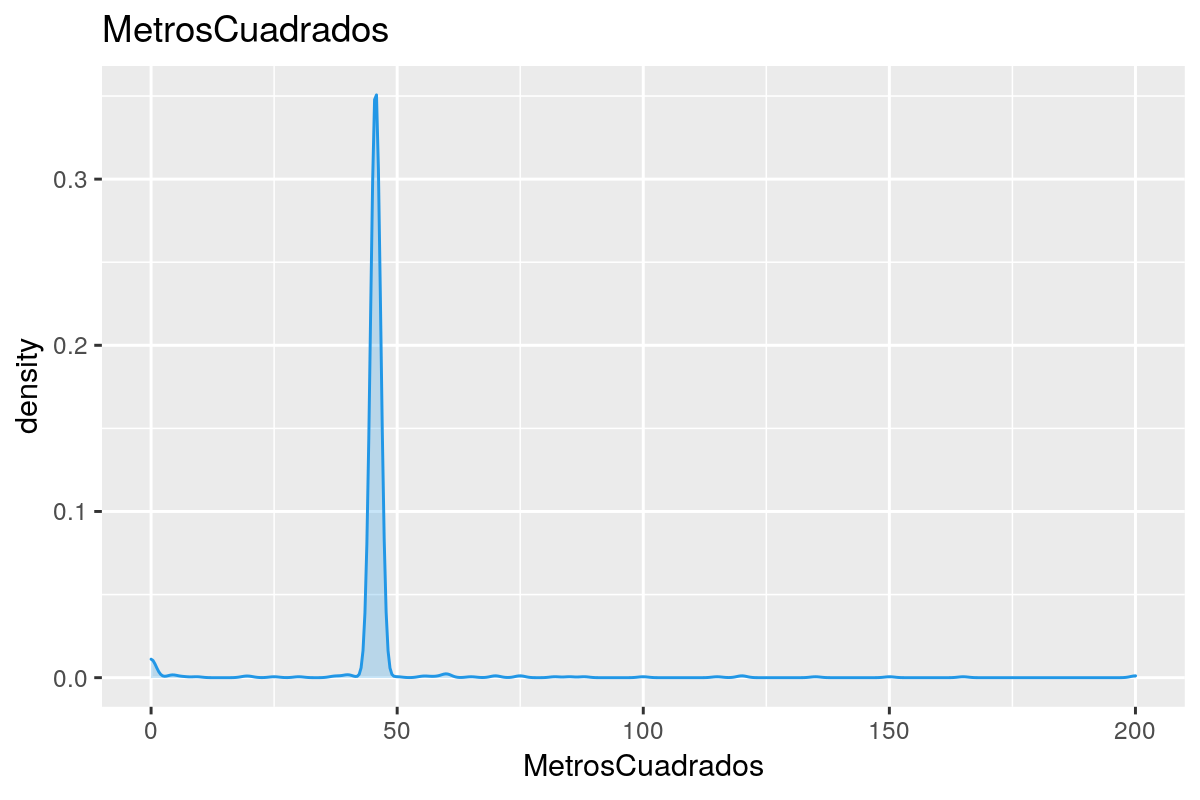

In [754]:
ggplot(barrio_sol, aes(x=MetrosCuadrados))+ 
        geom_density(color = 4,
               fill = 4,
               alpha = 0.25, bw=1) + ggtitle("MetrosCuadrados")

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [707]:
cor(barrio_sol[,c('Precio','NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')])

,Precio,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
Precio,1.0000000,0.6474419,0.6542553,0.6578409,0.1808880
NumBanyos,0.6474419,1.0000000,0.6761906,0.6578162,0.1607840
NumDormitorios,0.6542553,0.6761906,1.0000000,0.7594598,0.1917853
MaxOcupantes,0.6578409,0.6578162,0.7594598,1.0000000,0.1706579
MetrosCuadrados,0.1808880,0.1607840,0.1917853,0.1706579,1.0000000


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [710]:
#De acuerdo con el siguiente modelo, efectivamente podría ser Numero de Habitaciones, pero se identifica
#que es mejor utilizar la variable del número de baños
#Los metros cuadrados tienen  poco peso en la definición del precio

model <- lm(data = barrio_sol, formula = Precio ~ MaxOcupantes + NumDormitorios + NumBanyos + MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ MaxOcupantes + NumDormitorios + NumBanyos + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-235.961  -18.259   -3.806   13.519  257.114 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.96248    5.20066   1.723   0.0853 .  
MaxOcupantes     6.86556    1.03946   6.605 7.90e-11 ***
NumDormitorios  11.89544    2.17532   5.468 6.34e-08 ***
NumBanyos       28.65123    3.48208   8.228 9.35e-16 ***
MetrosCuadrados  0.13784    0.08932   1.543   0.1232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.09 on 696 degrees of freedom
Multiple R-squared:  0.5365,	Adjusted R-squared:  0.5339 
F-statistic: 201.4 on 4 and 696 DF,  p-value: < 2.2e-16


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [716]:
#Se propone un modelo para poder obtener MetrosCuadrados en función de las variables

model <- lm(data = barrio_sol, formula = MetrosCuadrados ~ MaxOcupantes + NumDormitorios + NumBanyos + Precio)
summary(model)


Call:
lm(formula = MetrosCuadrados ~ MaxOcupantes + NumDormitorios + 
    NumBanyos + Precio, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.352  -1.813   0.987   2.001 148.837 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    39.37379    1.62725  24.197   <2e-16 ***
MaxOcupantes    0.14927    0.45394   0.329   0.7424    
NumDormitorios  1.62061    0.93919   1.726   0.0849 .  
NumBanyos       0.56427    1.54517   0.365   0.7151    
Precio          0.02474    0.01603   1.543   0.1232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.87 on 696 degrees of freedom
Multiple R-squared:  0.04257,	Adjusted R-squared:  0.03707 
F-statistic: 7.736 on 4 and 696 DF,  p-value: 4.213e-06


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

De acuerdo con este modelo, la ecuación queda:

MetrosCuadrados = 0.14927MaxOcupantes + 1.62061NumDormitorios + 0.56427NumBanyos + 0.02474Precio


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [736]:
#Total de elementos en Barrio Sol
#dim(barrio_sol)

total_elementos <- 701

#numero de entradas con 3 dormitorios
num_apartamentos_3_dormitorios <- nrow(barrio_sol[barrio_sol$NumDormitorios == 3,])

probabilidad <- num_apartamentos_3_dormitorios/total_elementos

paste("Total de entradas en Barrio Sol: ", total_elementos)
paste("Total de apartamentos con 3 domitorios: ", num_apartamentos_3_dormitorios)
paste("La probabilidad es de: ", probabilidad)


[1] "Total de entradas en Barrio Sol:  701"

[1] "Total de apartamentos con 3 domitorios:  55"

[1] "La probabilidad es de:  0.0784593437945792"

In [764]:
paste("El intervalo de confianza se obtiene con el binom.test")
paste("considerando que tenemos una muestra de 55 dormitorios")
paste("exitosos con 3 apartamentos de un total de 701 apartamentos")

binom.test(55,701)

paste("El intervalo es:  [0.0596506,0.1009033]")

[1] "El intervalo de confianza se obtiene con el binom.test"

[1] "considerando que tenemos una muestra de 55 dormitorios"

[1] "exitosos con 3 apartamentos de un total de 701 apartamentos"


	Exact binomial test

data:  55 and 701
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 


[1] "El intervalo es:  [0.0596506,0.1009033]"